In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('osteoporosis.csv')
data.head()

,Id,Age,Gender,Hormonal Changes,Family History,Race/Ethnicity,Body Weight,Calcium Intake,Vitamin D Intake,Physical Activity,Smoking,Alcohol Consumption,Medical Conditions,Medications,Prior Fractures,Osteoporosis
0,1734616,69,Female,Normal,Yes,Asian,Underweight,Low,Sufficient,Sedentary,Yes,Moderate,Rheumatoid Arthritis,Corticosteroids,Yes,1
1,1419098,32,Female,Normal,Yes,Asian,Underweight,Low,Sufficient,Sedentary,No,NaN,NaN,NaN,Yes,1
2,1797916,89,Female,Postmenopausal,No,Caucasian,Normal,Adequate,Sufficient,Active,No,Moderate,Hyperthyroidism,Corticosteroids,No,1
3,1805337,78,Female,Normal,No,Caucasian,Underweight,Adequate,Insufficient,Sedentary,Yes,NaN,Rheumatoid Arthritis,Corticosteroids,No,1
4,1351334,38,Male,Postmenopausal,Yes,African American,Normal,Low,Sufficient,Active,Yes,NaN,Rheumatoid Arthritis,NaN,Yes,1


In [3]:
data.columns

Index(['Id', 'Age', 'Gender', 'Hormonal Changes', 'Family History',
       'Race/Ethnicity', 'Body Weight', 'Calcium Intake', 'Vitamin D Intake',
       'Physical Activity', 'Smoking', 'Alcohol Consumption',
       'Medical Conditions', 'Medications', 'Prior Fractures', 'Osteoporosis'],
      dtype='object')

In [4]:
data['Hormonal Changes'].value_counts()

Hormonal Changes
Normal            981
Postmenopausal    977
Name: count, dtype: int64

<Axes: >

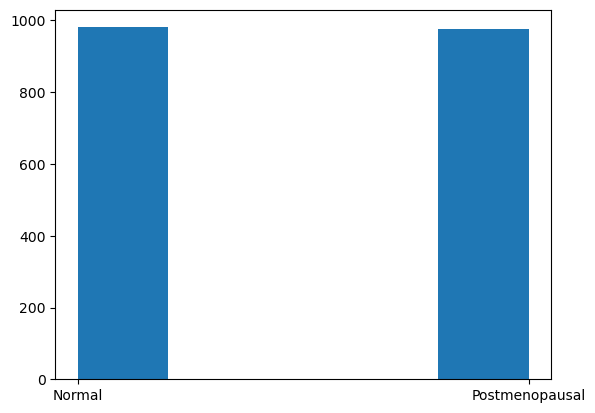

In [5]:
data['Hormonal Changes'].hist(grid=False, bins=5)

In [6]:
data.shape

(1958, 16)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1958 entries, 0 to 1957
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Id                   1958 non-null   int64 
 1   Age                  1958 non-null   int64 
 2   Gender               1958 non-null   object
 3   Hormonal Changes     1958 non-null   object
 4   Family History       1958 non-null   object
 5   Race/Ethnicity       1958 non-null   object
 6   Body Weight          1958 non-null   object
 7   Calcium Intake       1958 non-null   object
 8   Vitamin D Intake     1958 non-null   object
 9   Physical Activity    1958 non-null   object
 10  Smoking              1958 non-null   object
 11  Alcohol Consumption  970 non-null    object
 12  Medical Conditions   1311 non-null   object
 13  Medications          973 non-null    object
 14  Prior Fractures      1958 non-null   object
 15  Osteoporosis         1958 non-null   int64 
dtypes: int

In [8]:
dataset = pd.DataFrame({
    'Features' : data.columns,
    'No. of Missing Values' : data.isnull().sum().values,
    '% of Missing Values' : (data.isnull().sum().values) / len(data) *100,
    'No. of Nan Values' : data.isna().sum().values,
    'No. of Unique Values': data.nunique().values,
    'DataType': data.dtypes,
    'Len Data' : len(data)
})
dataset

,Features,No. of Missing Values,% of Missing Values,No. of Nan Values,No. of Unique Values,DataType,Len Data
Id,Id,0,0.000000,0,1958,int64,1958
Age,Age,0,0.000000,0,73,int64,1958
Gender,Gender,0,0.000000,0,2,object,1958
Hormonal Changes,Hormonal Changes,0,0.000000,0,2,object,1958
Family History,Family History,0,0.000000,0,2,object,1958
Race/Ethnicity,Race/Ethnicity,0,0.000000,0,3,object,1958
Body Weight,Body Weight,0,0.000000,0,2,object,1958
Calcium Intake,Calcium Intake,0,0.000000,0,2,object,1958
Vitamin D Intake,Vitamin D Intake,0,0.000000,0,2,object,1958
Physical Activity,Physical Activity,0,0.000000,0,2,object,1958


In [9]:
data.isnull().sum()

Id                       0
Age                      0
Gender                   0
Hormonal Changes         0
Family History           0
Race/Ethnicity           0
Body Weight              0
Calcium Intake           0
Vitamin D Intake         0
Physical Activity        0
Smoking                  0
Alcohol Consumption    988
Medical Conditions     647
Medications            985
Prior Fractures          0
Osteoporosis             0
dtype: int64

In [10]:
data.describe()

,Id,Age,Osteoporosis
count,1.958000e+03,1958.000000,1958.000000
mean,1.549929e+06,39.101124,0.500000
std,2.614250e+05,21.355424,0.500128
min,1.100064e+06,18.000000,0.000000
25%,1.319163e+06,21.000000,0.000000
50%,1.546028e+06,32.000000,0.500000
75%,1.775870e+06,53.000000,1.000000
max,1.999676e+06,90.000000,1.000000


In [11]:
data.shape

(1958, 16)

In [12]:
#replace missing values with "None"
data.fillna("None",inplace=True)

In [13]:
data.isnull().sum()

Id                     0
Age                    0
Gender                 0
Hormonal Changes       0
Family History         0
Race/Ethnicity         0
Body Weight            0
Calcium Intake         0
Vitamin D Intake       0
Physical Activity      0
Smoking                0
Alcohol Consumption    0
Medical Conditions     0
Medications            0
Prior Fractures        0
Osteoporosis           0
dtype: int64

In [14]:
len(data)

1958

In [15]:
print(f"Unique Value : {data['Alcohol Consumption'].value_counts()}\n")
print(f"Unique Value : {data['Medical Conditions'].value_counts()}\n")
print(f"Unique Value : {data['Medications'].value_counts()}\n")

Unique Value : Alcohol Consumption
None        988
Moderate    970
Name: count, dtype: int64

Unique Value : Medical Conditions
Hyperthyroidism         678
None                    647
Rheumatoid Arthritis    633
Name: count, dtype: int64

Unique Value : Medications
None               985
Corticosteroids    973
Name: count, dtype: int64



In [16]:
data = data.drop(['Id'], axis=1)
data.head()

,Age,Gender,Hormonal Changes,Family History,Race/Ethnicity,Body Weight,Calcium Intake,Vitamin D Intake,Physical Activity,Smoking,Alcohol Consumption,Medical Conditions,Medications,Prior Fractures,Osteoporosis
0,69,Female,Normal,Yes,Asian,Underweight,Low,Sufficient,Sedentary,Yes,Moderate,Rheumatoid Arthritis,Corticosteroids,Yes,1
1,32,Female,Normal,Yes,Asian,Underweight,Low,Sufficient,Sedentary,No,None,None,None,Yes,1
2,89,Female,Postmenopausal,No,Caucasian,Normal,Adequate,Sufficient,Active,No,Moderate,Hyperthyroidism,Corticosteroids,No,1
3,78,Female,Normal,No,Caucasian,Underweight,Adequate,Insufficient,Sedentary,Yes,None,Rheumatoid Arthritis,Corticosteroids,No,1
4,38,Male,Postmenopausal,Yes,African American,Normal,Low,Sufficient,Active,Yes,None,Rheumatoid Arthritis,None,Yes,1


In [17]:
data.columns

Index(['Age', 'Gender', 'Hormonal Changes', 'Family History', 'Race/Ethnicity',
       'Body Weight', 'Calcium Intake', 'Vitamin D Intake',
       'Physical Activity', 'Smoking', 'Alcohol Consumption',
       'Medical Conditions', 'Medications', 'Prior Fractures', 'Osteoporosis'],
      dtype='object')

In [18]:
# Find Numerical Columns
num_col=[]
for col in data.columns:
    if (data[col].dtypes != 'object'):
        num_col.append(col)
print(f"There are total : {len(num_col)} numerical columns in dataset")
print(num_col)

There are total : 2 numerical columns in dataset
['Age', 'Osteoporosis']


In [19]:
# Find Categorical Columns
cat_cols = []
for col in data.columns:
    if (data[col].dtypes == 'object'):
        cat_cols.append(col)

print(f"There are total : ({len(cat_cols)}) categorical columns in dataset")
print(cat_cols)

There are total : (13) categorical columns in dataset
['Gender', 'Hormonal Changes', 'Family History', 'Race/Ethnicity', 'Body Weight', 'Calcium Intake', 'Vitamin D Intake', 'Physical Activity', 'Smoking', 'Alcohol Consumption', 'Medical Conditions', 'Medications', 'Prior Fractures']


Text(0.5, 1.0, 'Osteoporosis')

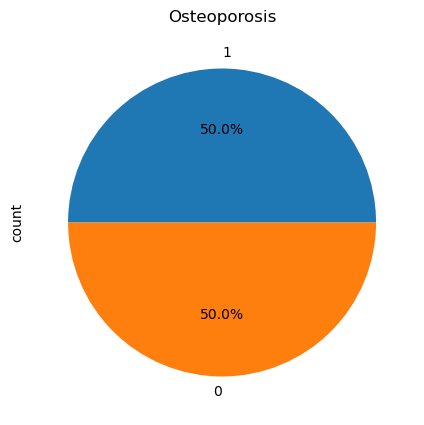

In [20]:
plt.figure(figsize=(5,5))
data['Osteoporosis'].value_counts().plot.pie(autopct='%1.1f%%').set_title('Osteoporosis')

Text(0.5, 1.0, 'Gender')

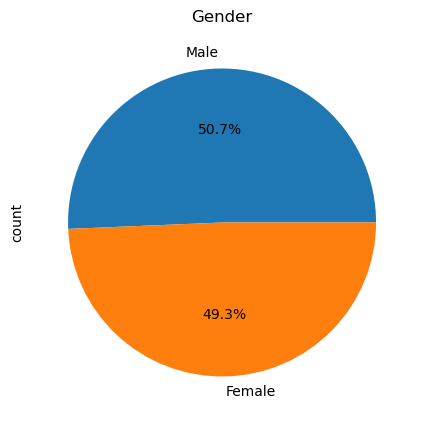

In [21]:
plt.figure(figsize=(5, 5))
data['Gender'].value_counts().plot.pie(autopct='%1.1f%%').set_title('Gender')

# Data Preprocessing

In [22]:
print(cat_cols)

['Gender', 'Hormonal Changes', 'Family History', 'Race/Ethnicity', 'Body Weight', 'Calcium Intake', 'Vitamin D Intake', 'Physical Activity', 'Smoking', 'Alcohol Consumption', 'Medical Conditions', 'Medications', 'Prior Fractures']


In [23]:
# Label Encoding the Categorical Variables

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for i in cat_cols:
    data[i] = le.fit_transform(data[i])
    print(f"{i} : {data[col].unique()}")

Gender : [1 0]
Hormonal Changes : [1 0]
Family History : [1 0]
Race/Ethnicity : [1 0]
Body Weight : [1 0]
Calcium Intake : [1 0]
Vitamin D Intake : [1 0]
Physical Activity : [1 0]
Smoking : [1 0]
Alcohol Consumption : [1 0]
Medical Conditions : [1 0]
Medications : [1 0]
Prior Fractures : [1 0]


In [24]:
data['Medical Conditions'].unique()

array([2, 1, 0])

In [25]:
data.head()

,Age,Gender,Hormonal Changes,Family History,Race/Ethnicity,Body Weight,Calcium Intake,Vitamin D Intake,Physical Activity,Smoking,Alcohol Consumption,Medical Conditions,Medications,Prior Fractures,Osteoporosis
0,69,0,0,1,1,1,1,1,1,1,0,2,0,1,1
1,32,0,0,1,1,1,1,1,1,0,1,1,1,1,1
2,89,0,1,0,2,0,0,1,0,0,0,0,0,0,1
3,78,0,0,0,2,1,0,0,1,1,1,2,0,0,1
4,38,1,1,1,0,0,1,1,0,1,1,2,1,1,1


<Axes: >

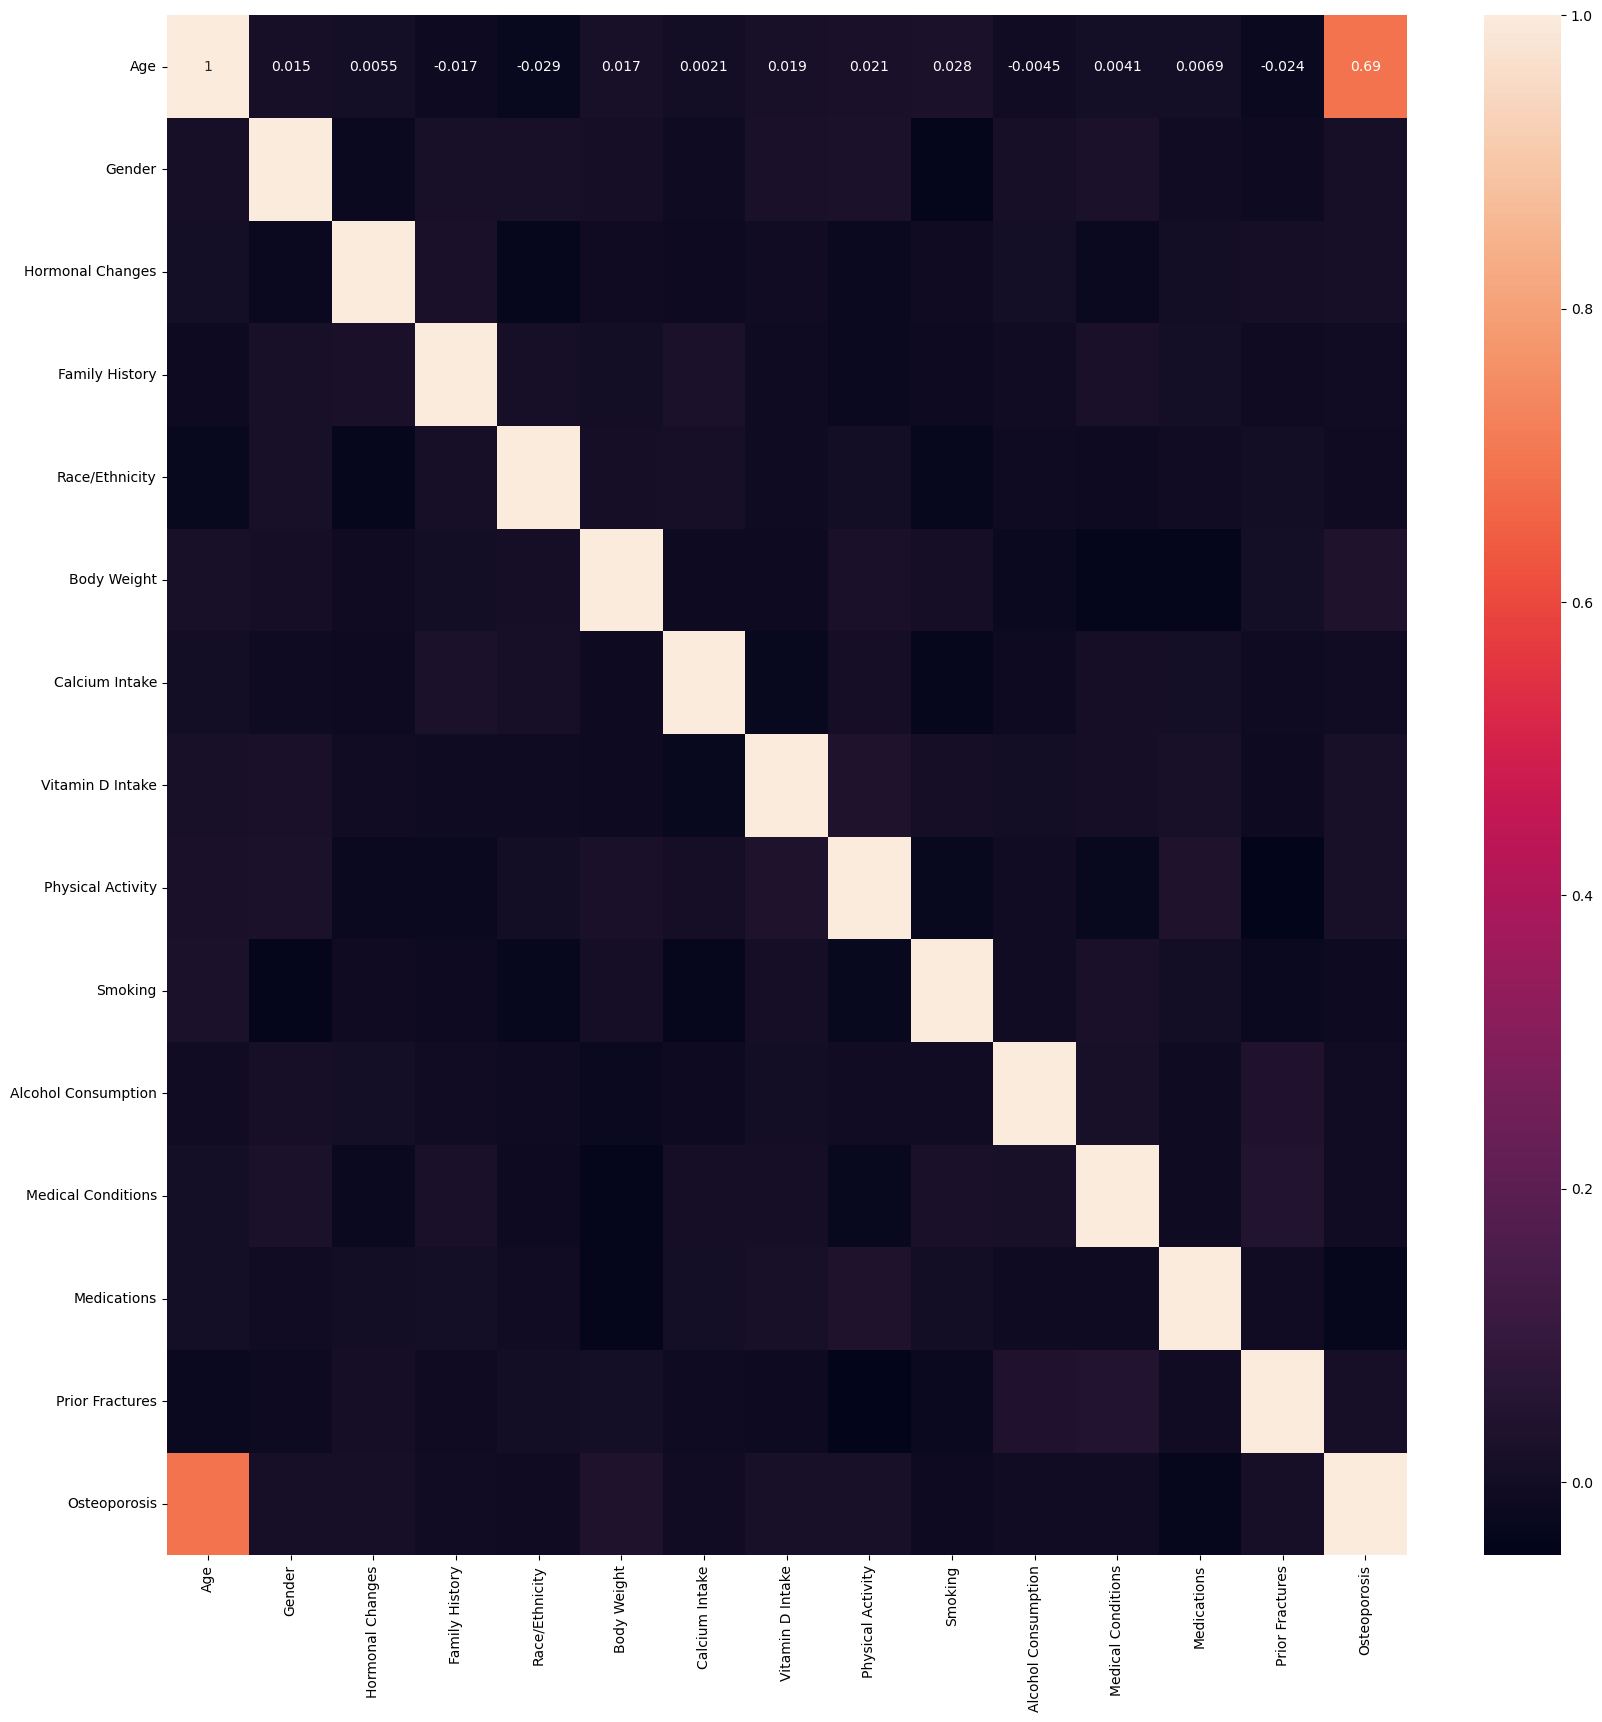

In [26]:
# Correlation Matrix Heatmap
plt.figure(figsize=(20,20))
sns.heatmap(data.corr(), annot=True)

# Train Test Split

In [27]:
y = data['Osteoporosis']
X = data.iloc[:, :-1]
X.head()

,Age,Gender,Hormonal Changes,Family History,Race/Ethnicity,Body Weight,Calcium Intake,Vitamin D Intake,Physical Activity,Smoking,Alcohol Consumption,Medical Conditions,Medications,Prior Fractures
0,69,0,0,1,1,1,1,1,1,1,0,2,0,1
1,32,0,0,1,1,1,1,1,1,0,1,1,1,1
2,89,0,1,0,2,0,0,1,0,0,0,0,0,0
3,78,0,0,0,2,1,0,0,1,1,1,2,0,0
4,38,1,1,1,0,0,1,1,0,1,1,2,1,1


In [28]:
print(len(y))
print(len(X))

1958
1958


In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train ,y_test = train_test_split(X, y, random_state=1234, stratify=y) 

# Logistic Regression

In [30]:
from sklearn.linear_model import LogisticRegression

# Hyperparameter Tuning using GridSearchCV

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.1, 1, 10, 100, 1000],
'penalty': ['l1', 'l2'],
'solver': ['liblinear'],
'max_iter': [100, 1000, 2500, 5000],
'multi_class': ['auto', 'ovr'],
'random_state': [0,42,101]}

grid = GridSearchCV(estimator= LogisticRegression(), param_grid= param_grid, refit=True, verbose=3, cv=5, n_jobs=-1, scoring='accuracy')

grid.fit(X_train,y_train)
#best parameters
print(grid.best_params_)


In [31]:
logic_model = LogisticRegression(C=1, max_iter=100, multi_class='auto', random_state=0, solver='liblinear')
logic_model.fit(X_train, y_train)

LogisticRegression(C=1, random_state=0, solver='liblinear')

In [32]:
print("Training accuracy:",logic_model.score(X_train,y_train))
print("Test accuracy:",logic_model.score(X_test,y_test))

Training accuracy: 0.8310626702997275
Test accuracy: 0.8183673469387756


In [33]:
logic_pred = logic_model.predict(X_test)

In [35]:
from sklearn.metrics import classification_report
print(classification_report(y_test, logic_pred))

              precision    recall  f1-score   support

           0       0.79      0.87      0.83       245
           1       0.85      0.77      0.81       245

    accuracy                           0.82       490
   macro avg       0.82      0.82      0.82       490
weighted avg       0.82      0.82      0.82       490



# Random Forest

In [36]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [2,5,10],
    'random_state': [0,42,101]
}

grid1 = GridSearchCV(estimator=RandomForestClassifier(), param_grid=param_grid, cv=5, n_jobs=-1, verbose=10,refit=True,scoring='accuracy')
grid1.fit(X_train, y_train)

grid1.best_params_

In [ ]:
grid1.best_estimator_

In [37]:
random_model = RandomForestClassifier(criterion='gini', max_depth=20, min_samples_leaf=2, min_samples_split=2, random_state=42)
random_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=20, min_samples_leaf=2, random_state=42)

In [38]:
forest_pred = random_model.predict(X_test)

In [39]:
print("Training accuracy:",random_model.score(X_train,y_train))
print("Test accuracy:",random_model.score(X_test,y_test))

Training accuracy: 0.9434604904632152
Test accuracy: 0.8510204081632653


In [40]:
print(classification_report(y_test, forest_pred))

              precision    recall  f1-score   support

           0       0.78      0.98      0.87       245
           1       0.97      0.73      0.83       245

    accuracy                           0.85       490
   macro avg       0.87      0.85      0.85       490
weighted avg       0.87      0.85      0.85       490



# Model Evaluation

[[213  32]
 [ 57 188]]


Text(0.5, 1.0, 'Random Forest')

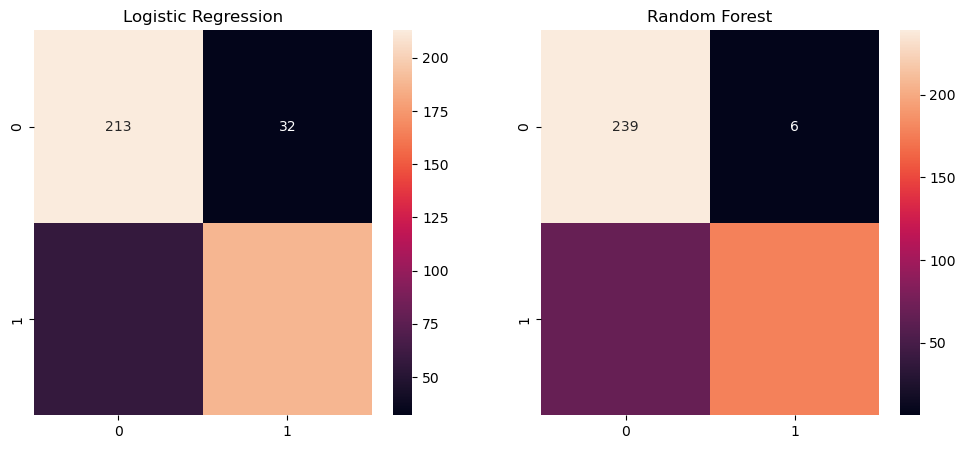

In [59]:
from sklearn.metrics import confusion_matrix
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

#confusion matrix for logistic regression
cm = confusion_matrix(y_test, logic_pred)
print(cm)
sns.heatmap(cm, annot=True, ax = ax[0], fmt='g').set_title('Logistic Regression')

#confusion matrix for random forest
cm = confusion_matrix(y_test, forest_pred)
sns.heatmap(cm, annot=True, ax = ax[1], fmt='g').set_title('Random Forest')


In [ ]:
from sklearn.metrics import accuracy_score
models = ['Logistic Regression', 'Random Forest']
accuracy = [accuracy_score(y_test, logic_pred), accuracy_score(y_test, forest_pred)]
plt.figure(figsize=(10,5))
sns.barplot(x=models, y=accuracy).set_title('Model Accuracy')

# Feature Importance

In [ ]:
global_importances = pd.Series(random_model.feature_importances_, index=X_train.columns)
global_importances.sort_values(ascending=True, inplace=True)
global_importances.plot.barh(color='blue')
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title('Feature Importance for Random Forest')

In [ ]:
global_importances = pd.Series(logic_model.coef_[0], index=X_train.columns)
global_importances.sort_values(ascending=True, inplace=True)
global_importances.plot.barh(color='blue')
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title('Feature Importance for Logistic Regression')